In [86]:
# ! pip install pandas-profiling

In [1]:
import pandas as pd
import seaborn as sns
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling

In [2]:
df15 = pd.read_csv('data/kaggle/players_15.csv')
df16 = pd.read_csv('data/kaggle/players_16.csv')
df17 = pd.read_csv('data/kaggle/players_17.csv')
df18 = pd.read_csv('data/kaggle/players_18.csv')
df19 = pd.read_csv('data/kaggle/players_19.csv')
df20 = pd.read_csv('data/kaggle/players_20.csv')

In [3]:
df20.shape

(18278, 104)

In [4]:
df20.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


In [5]:
df20.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [6]:
df20['value_eur']

0         95500000
1         58500000
2        105500000
3         77500000
4         90000000
           ...    
18273        40000
18274        40000
18275        40000
18276        40000
18277        40000
Name: value_eur, Length: 18278, dtype: int64

<AxesSubplot:xlabel='value_eur', ylabel='Count'>

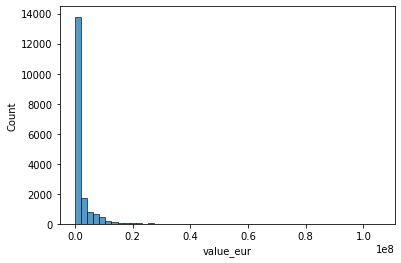

In [7]:
sns.histplot(df20['value_eur'], bins=50)

In [8]:
a_series = (df20['value_eur'] != 0)
df20_new = df20.loc[a_series] 

In [9]:
df20_new['player_traits']

0        Beat Offside Trap, Argues with Officials, Earl...
1        Long Throw-in, Selfish, Argues with Officials,...
2        Power Free-Kick, Injury Free, Selfish, Early C...
3                               Flair, Acrobatic Clearance
4        Beat Offside Trap, Selfish, Finesse Shot, Spee...
                               ...                        
18273                                                  NaN
18274                                                  NaN
18275                                                  NaN
18276                                                  NaN
18277                                                  NaN
Name: player_traits, Length: 18028, dtype: object

In [10]:
df20_new[df20_new['short_name'] == 'L. Messi']

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2


In [41]:
df20_new.shape

(18028, 104)

C:\Anaconda3\envs\cs109a\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='value_eur', ylabel='wage_eur'>

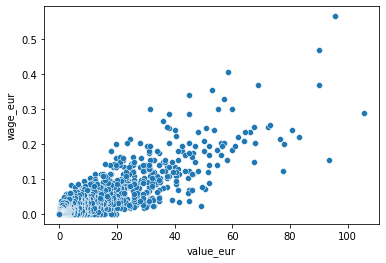

In [42]:
sns.scatterplot(df20_new['value_eur']/1000000, df20_new['wage_eur']/1000000)

In [44]:
#hueを入れてどの様な選手がUndervalueされている可能性があるのか考えたい。
# value to wage ratio
df20_new_log = df20_new.copy()
df20_new_log['value_to_wage'] = (df20_new_log['value_eur']/1000000) / (df20_new_log['wage_eur']/1000000)
# sns.scatterplot(df20['value_eur']/1000000, df20['wage_eur']/1000000)

In [45]:
df20_new_log.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,value_to_wage
count,18028.000000,18028.000000,18028.000000,18028.000000,18028.000000,18028.000000,1.802800e+04,18028.000000,18028.000000,18028.000000,...,18028.000000,18028.000000,18028.000000,18028.000000,18028.000000,18028.000000,18028.000000,18028.000000,18028.000000,18028.000000
mean,219731.918405,25.226259,181.361549,75.262370,66.205957,71.559463,2.518485e+06,9584.812514,1.102729,2.942922,...,58.495174,46.828378,47.626082,45.591358,16.510428,16.301143,16.160417,16.310462,16.657588,354.730505
std,27767.865264,4.633887,6.755595,7.050708,6.953858,6.140816,5.616359e+06,21470.293479,0.378438,0.664594,...,11.855041,20.049283,21.555141,21.183823,17.660094,16.925791,16.553301,17.057334,17.968059,781.984405
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,1.000000e+04,1000.000000,1.000000,1.000000,...,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000
25%,204449.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,133.333333
50%,226117.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.250000e+05,3000.000000,1.000000,3.000000,...,59.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,225.000000
75%,240689.250000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,366.666667
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000,19500.000000


In [46]:
# log transformation
# df20['value to wage'] = df20['value to wage'].map(math.log)
df20_new_log['value_to_wage_log'] = np.log(df20_new_log['value_to_wage'])

<AxesSubplot:xlabel='value_to_wage_log', ylabel='Count'>

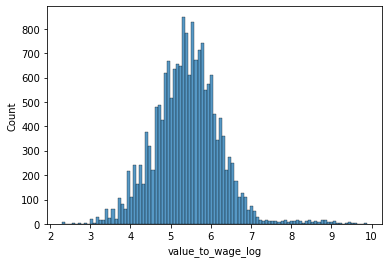

In [50]:
sns.histplot(data=df20_new_log['value_to_wage_log'])

In [55]:
# super high value_to_wage_log players
# df_high_value_wage = df20_new_log[df20_new_log['value_to_wage_log'] >= 7.5]
# df_average_value_wage = df20_new_log[df20_new_log['value_to_wage_log'] >= 7.5]
# df_low_value_wage = df20_new_log[df20_new_log['value_to_wage_log'] >= 7.5]

C:\Anaconda3\envs\cs109a\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='value_eur', ylabel='wage_eur'>

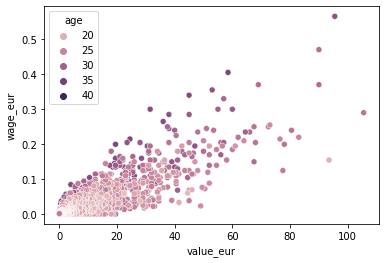

In [54]:
sns.scatterplot(df20_new_log['value_eur']/1000000, df20_new_log['wage_eur']/1000000, hue=df20_new_log['age'])

In [63]:
# for column in list(df20_new_log.columns):
#     sns.scatterplot(df20_new_log['value_to_wage_log'], df20_new_log[column])

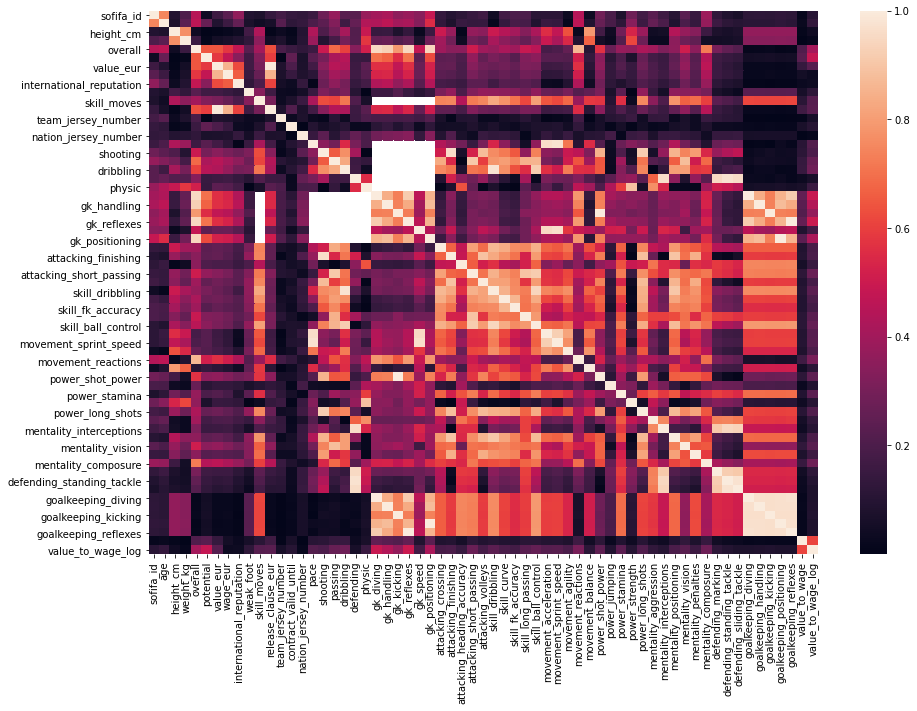

In [62]:
# correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df20_new_log.corr().abs())
plt.show()

C:\Anaconda3\envs\cs109a\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='value_to_wage_log', ylabel='gk_handling'>

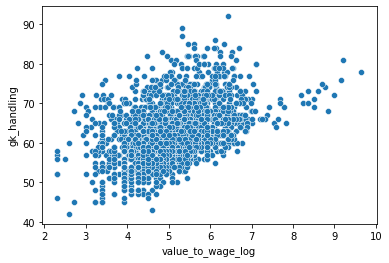

In [68]:
# based on above heatmap, it looks like gk related ability may be related to the value-to-wage ratio.
sns.scatterplot(df20_new_log['value_to_wage_log'], df20_new_log['gk_handling'])

C:\Anaconda3\envs\cs109a\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='value_to_wage_log', ylabel='gk_reflexes'>

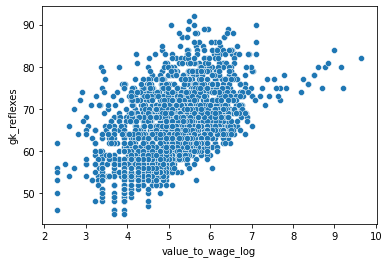

In [69]:
sns.scatterplot(df20_new_log['value_to_wage_log'], df20_new_log['gk_reflexes'])

C:\Anaconda3\envs\cs109a\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='value_to_wage_log', ylabel='gk_positioning'>

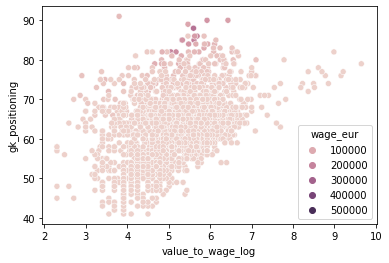

In [73]:
sns.scatterplot(df20_new_log['value_to_wage_log'], df20_new_log['gk_positioning'], hue=df20_new_log['wage_eur'])

In [72]:
df20_new_log['player_positions'].value_counts()

CB             2289
GK             1996
ST             1783
CM              779
CDM, CM         718
               ... 
RW, CM, ST        1
RM, LW, RW        1
ST, RM, CAM       1
RM, CF, CM        1
CAM, RM, RB       1
Name: player_positions, Length: 642, dtype: int64

# Part A - Rank the Players

In [74]:
# Part A - Rank the Players

In [78]:
list(df20_new_log.columns)

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_re

<AxesSubplot:xlabel='overall', ylabel='Count'>

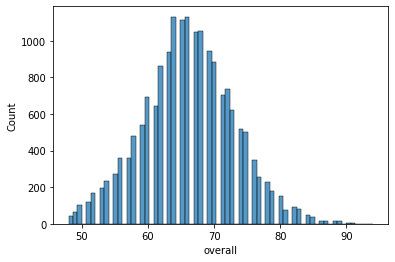

In [82]:
sns.histplot(data=df20_new_log['overall'])

In [83]:
df20_new_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18028 entries, 0 to 18277
Columns: 106 entries, sofifa_id to value_to_wage_log
dtypes: float64(18), int64(45), object(43)
memory usage: 14.7+ MB


In [88]:
df20_new_log.profile_report()

KeyboardInterrupt: 

In [92]:
df_club = pd.DataFrame(df20_new_log['club'].value_counts())

In [95]:
list(df_club.index)

['Udinese',
 '1. FC Union Berlin',
 'Hellas Verona',
 'Wolverhampton Wanderers',
 'Everton',
 'CD Leganés',
 'Sevilla FC',
 'Liverpool',
 'Leicester City',
 'SC Paderborn 07',
 'Manchester City',
 'Newcastle United',
 'Crystal Palace',
 'Paris Saint-Germain',
 'RC Celta',
 'Juventus',
 'VfL Wolfsburg',
 'Sheffield United',
 'Real Valladolid CF',
 'Norwich City',
 'Real Madrid',
 'RB Leipzig',
 'Tottenham Hotspur',
 'Aston Villa',
 'Lecce',
 '1. FSV Mainz 05',
 'Fortuna Düsseldorf',
 'Brighton & Hove Albion',
 'Athletic Club de Bilbao',
 'Burnley',
 'Valencia CF',
 'Southampton',
 'FC Nantes',
 'AS Monaco',
 'Deportivo Alavés',
 'Parma',
 'Manchester United',
 'Lazio',
 'FC Barcelona',
 'FC Augsburg',
 'Watford',
 'Borussia Mönchengladbach',
 'Hertha BSC',
 'Arsenal',
 'Eintracht Frankfurt',
 'Chelsea',
 'West Ham United',
 'Bournemouth',
 'Atlético Madrid',
 'Sampdoria',
 'Genoa',
 'Amiens SC',
 'Villarreal CF',
 'Levante UD',
 'FC Girondins de Bordeaux',
 'AS Saint-Étienne',
 'Roma',
